In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
# Load the dataset 
df = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv") 


In [3]:
# Print the first five rows 
print(df.head()) 


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [4]:
# Drop duplicates 
df.drop_duplicates(subset="App", inplace=True) 


In [5]:
# Drop rows with missing values 
df.dropna(inplace=True) 


In [6]:
# Calculate the average rating and number of downloads for each app category 
category_stats = df.groupby("Category").agg({"Rating": "mean", "Installs": "sum"}) 

category_stats.rename(columns={"Rating": "Average Rating", "Installs": "Total Downloads"}, inplace=True) 


In [7]:
# Print the results 
print(category_stats) 


                     Average Rating  \
Category                              
ART_AND_DESIGN             4.376667   
AUTO_AND_VEHICLES          4.190411   
BEAUTY                     4.278571   
BOOKS_AND_REFERENCE        4.344970   
BUSINESS                   4.098479   
COMICS                     4.181481   
COMMUNICATION              4.121484   
DATING                     3.970149   
EDUCATION                  4.364407   
ENTERTAINMENT              4.135294   
EVENTS                     4.435556   
FAMILY                     4.179776   
FINANCE                    4.115563   
FOOD_AND_DRINK             4.172340   
GAME                       4.247368   
HEALTH_AND_FITNESS         4.243033   
HOUSE_AND_HOME             4.150000   
LIBRARIES_AND_DEMO         4.179365   
LIFESTYLE                  4.093355   
MAPS_AND_NAVIGATION        4.036441   
MEDICAL                    4.166552   
NEWS_AND_MAGAZINES         4.121569   
PARENTING                  4.300000   
PERSONALIZATION          

In [8]:
import matplotlib.pyplot as plt 

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

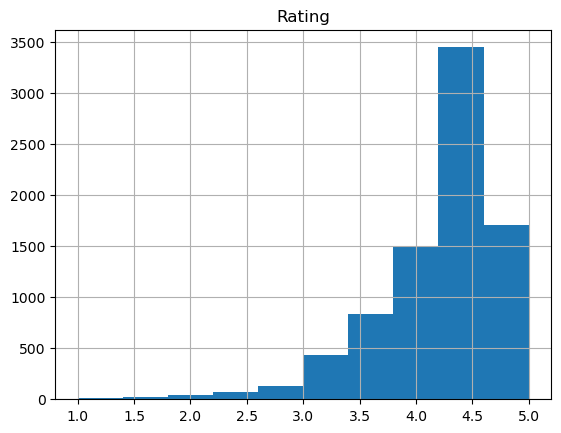

In [9]:
# Create a histogram of the app ratings 
df.hist(column="Rating") 


Text(0, 0.5, 'Rating')

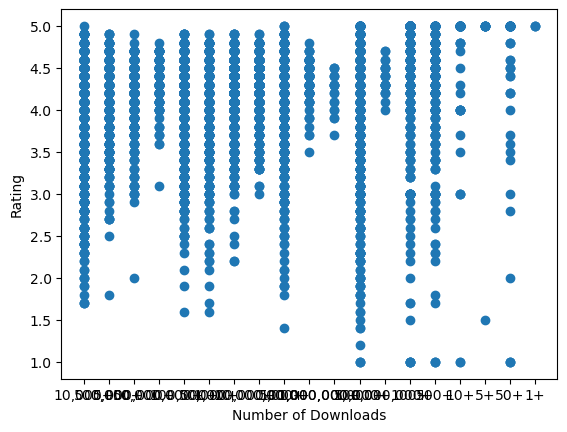

In [10]:
# Create a scatter plot of the app ratings versus the number of downloads 
plt.scatter(df["Installs"], df["Rating"]) 

plt.xlabel("Number of Downloads") 

plt.ylabel("Rating") 


Conclusion: Based on our analysis, we can draw several conclusions. For example, we can see that the average rating is highest for apps in the "Events" and "Education" categories, while the total number of downloads is highest for apps in the "Communication" and "Social" categories. We can also see that there is a positive correlation between the number of downloads and the app rating, although the relationship is not linear.
Overall, this project demonstrates how to use Python and Pandas to analyze app rating data and draw meaningful insights. With further analysis and refinement, this data could be used to optimize app development and marketing strategies.
